In [1]:
#Set up your environment.
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

print('done')

done


# Loading The Datasets

In [2]:
df = pd.read_csv('./datasets/africa_food_prices.csv')

In [3]:
# Checking How Many Columns Are In The Dataframe
df.columns

Index(['Unnamed: 0', 'country_id', 'country', 'state_id', 'state', 'market_id',
       'market', 'produce_id', 'produce', 'currency_id', 'currency', 'pt_id',
       'market_type', 'um_unit_id', 'quantity', 'month', 'year', 'price',
       'mp_commoditysource'],
      dtype='object')

In [4]:
allCols = ['Unnamed: 0', 'country_id', 'country', 'state_id', 'state', 'market_id',
       'market', 'produce_id', 'produce', 'currency_id', 'currency', 'pt_id',
       'market_type', 'um_unit_id', 'quantity', 'month', 'year', 'price',
       'mp_commoditysource']
dropCols = ['Unnamed: 0','country_id', 'state_id', 'market_id', 'produce_id', 'currency_id', 'pt_id', 'um_unit_id', 'mp_commoditysource']

In [5]:
df = df.drop(columns = dropCols)

# Removing white spaces from the beginning and the end of every string in the dataframe

In [6]:
df.columns.str.strip()

Index(['country', 'state', 'market', 'produce', 'currency', 'market_type',
       'quantity', 'month', 'year', 'price'],
      dtype='object')

# Droping Null Values from the dataframe

In [7]:
df.dropna()

,country,state,market,produce,currency,market_type,quantity,month,year,price
0,Algeria,Alger,Algiers,Rice - Retail,DZD,Retail,KG,4,2015,90.0000
1,Algeria,Alger,Algiers,Rice - Retail,DZD,Retail,KG,5,2015,96.0000
2,Algeria,Alger,Algiers,Rice - Retail,DZD,Retail,KG,6,2015,96.0000
3,Algeria,Alger,Algiers,Rice - Retail,DZD,Retail,KG,7,2015,83.0000
4,Algeria,Alger,Algiers,Rice - Retail,DZD,Retail,KG,8,2015,80.0000
...,...,...,...,...,...,...,...,...,...,...
956774,Zimbabwe,Midlands,Mbilashaba,Beans (sugar) - Retail,ZWL,Retail,KG,6,2021,233.3333
956775,Zimbabwe,Midlands,Mbilashaba,Toothpaste - Retail,ZWL,Retail,100 ML,6,2021,112.5000
956776,Zimbabwe,Midlands,Mbilashaba,Laundry soap - Retail,ZWL,Retail,KG,6,2021,114.0000
956777,Zimbabwe,Midlands,Mbilashaba,Handwash soap - Retail,ZWL,Retail,250 G,6,2021,59.5000


In [8]:
# Checking if there is.........................
df.isnull().sum()

country             0
state          126678
market              0
produce             0
currency            0
market_type         0
quantity            0
month               0
year                0
price               0
dtype: int64

# Grouping the dataset with the Market_Type Column Which are the Retailers, Wholesalers and Producers

In [9]:
group = df.groupby('market_type')

In [10]:
st = group.first()

In [11]:
# Assigning Variables

Wholesale = df[df['market_type']== 'Wholesale']
Retail = df[df['market_type']== 'Retail']
Produce = df[df['market_type']== 'Producer']

# Prices Of Commodities From The Wholesalers In Africa (Visualization)

These explains how prices moves from the wholesalers to the retailer and thats how inflations starts in the country

------Lets take a quick overview of the data

<Figure size 1080x576 with 0 Axes>

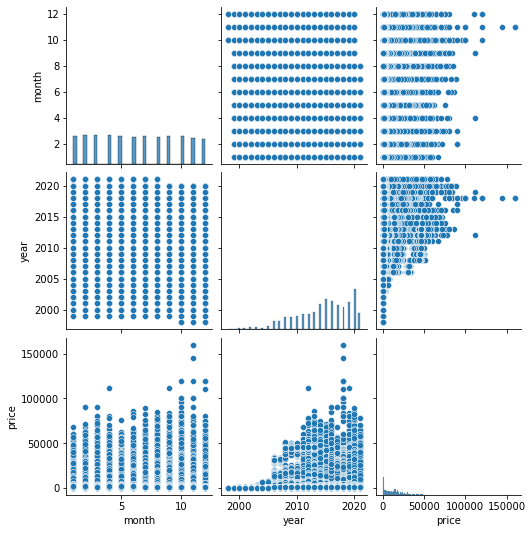

In [12]:
plt.figure(figsize=(15,8))
sns.pairplot(Wholesale)

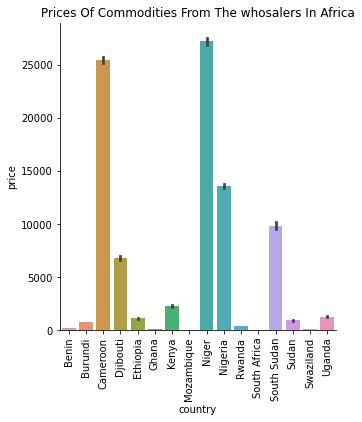

In [13]:
sns.catplot(data=Wholesale, kind='bar', y='price', x = 'country')
plt.title('Prices Of Commodities From The whosalers In Africa')
plt.xticks(rotation=90)
plt.show()

# Prices Of Commodities From The Retailers In Africa (Visualization)

------Lets take a quick overview of the data

In [14]:
retailgrp = Retail.groupby("state")

In [15]:
des = retailgrp.first()

<Figure size 1080x576 with 0 Axes>

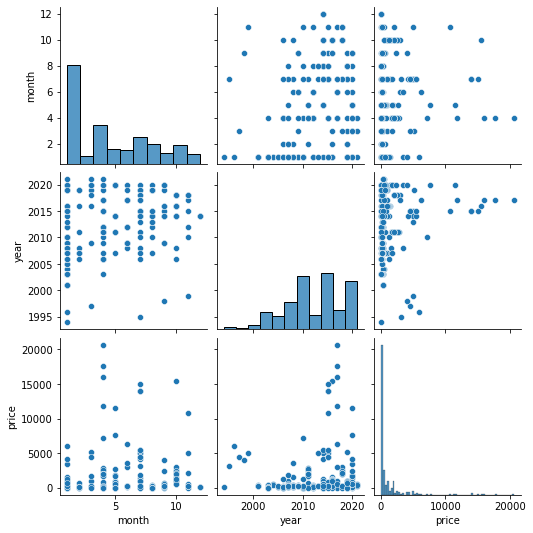

In [16]:
plt.figure(figsize=(15,8))
sns.pairplot(des)

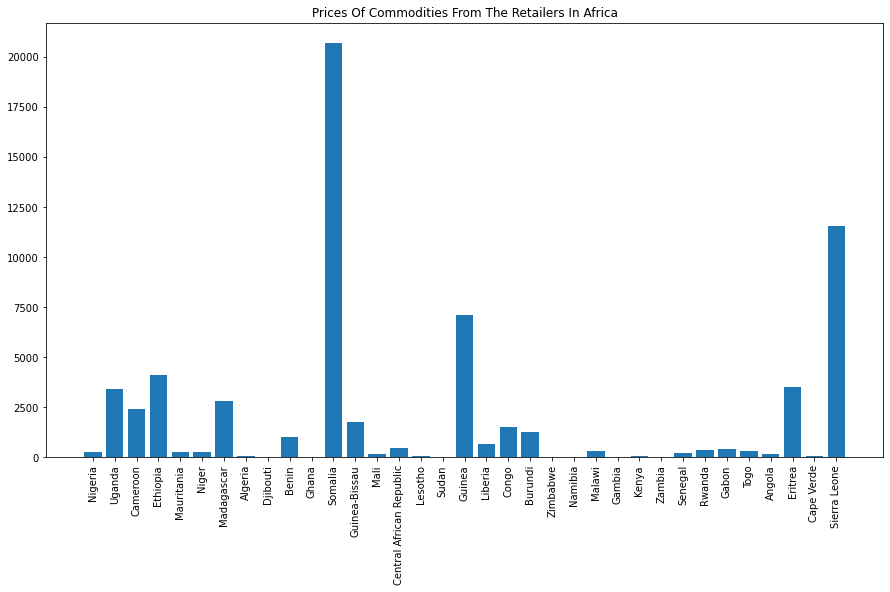

<Figure size 1080x432 with 0 Axes>

In [17]:
x = des['country']
y = des['price']
plt.figure(figsize=(15,8))
plt.bar(x,y)
plt.title('Prices Of Commodities From The Retailers In Africa')
plt.xticks(rotation=90)
plt.figure(figsize=(15,6))
plt.show()

# Prices Of Commodities From The Producers In Africa (Visualization)

-- Lets get a quick overview of our dataset

<Figure size 1080x576 with 0 Axes>

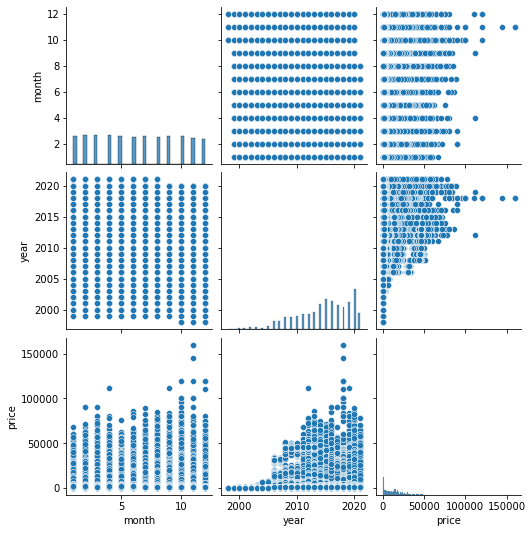

In [18]:
plt.figure(figsize=(15,8))
sns.pairplot(Wholesale)

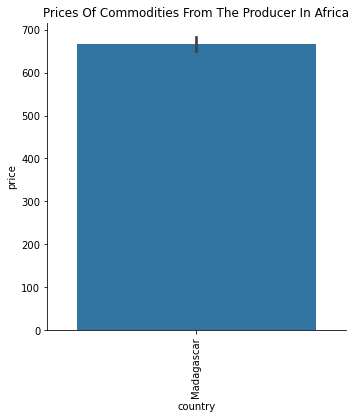

In [19]:
sns.catplot(data=Produce, kind='bar', y='price', x = 'country')
plt.title('Prices Of Commodities From The Producer In Africa')
plt.xticks(rotation=90)
plt.show()

# Pivot Tables

In [20]:
pivot_table = pd.pivot_table(df, index=['country', 'year', 'month','market'], values = ['price'], aggfunc='mean')

For the purpose of this research we would be focusing on the Nothern and Southern part of Africa.
I have uniquely identified the countries in both region.
In subesequent cells we would be making a comparison in minimum prices between both regions.

In [21]:
southern_region = pivot_table.query("country == ['Zimbabwe', 'Zambia','Angola', 'Botswana', 'Lesotho','Mozambique', 'Namibia','South Africa','Swaziland']")

northern_region = pivot_table.query("country == ['Algeria','Egypt',' Libya','Morocco','Sudan','Tunisia','Western Sahara']")

In [22]:
southern_regionResetIndex = southern_region.reset_index()

northern_regionResetIndex = northern_region.reset_index()

Text(0, 0.5, 'Prices')

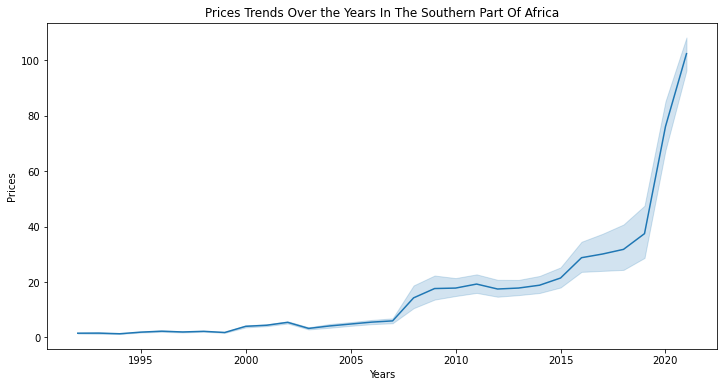

In [23]:
southDS = southern_regionResetIndex
plt.figure(figsize=(12,6))
plt.title("Prices Trends Over the Years In The Southern Part Of Africa")
sns.lineplot(x="year", y="price",data=southDS)
plt.xlabel("Years")
plt.ylabel("Prices")

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

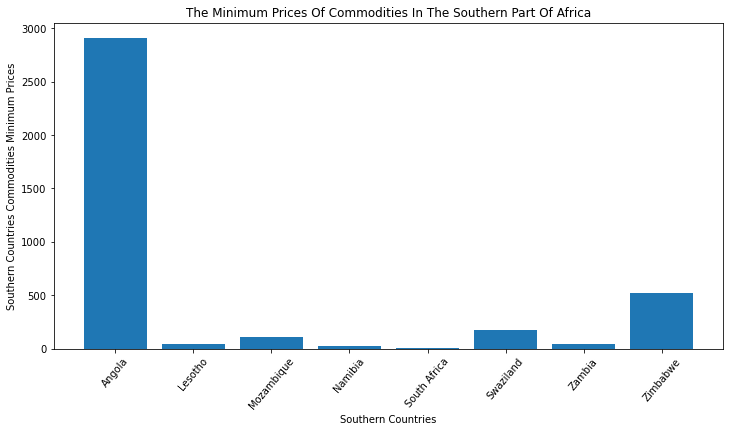

In [24]:
southX = southern_regionResetIndex.country

southY = southern_regionResetIndex.price

plt.figure(figsize=(12,6))
plt.bar(southX,southY)
plt.title("The Minimum Prices Of Commodities In The Southern Part Of Africa")
plt.xlabel("Southern Countries")
plt.ylabel("Southern Countries Commodities Minimum Prices")
plt.xticks(rotation=50)

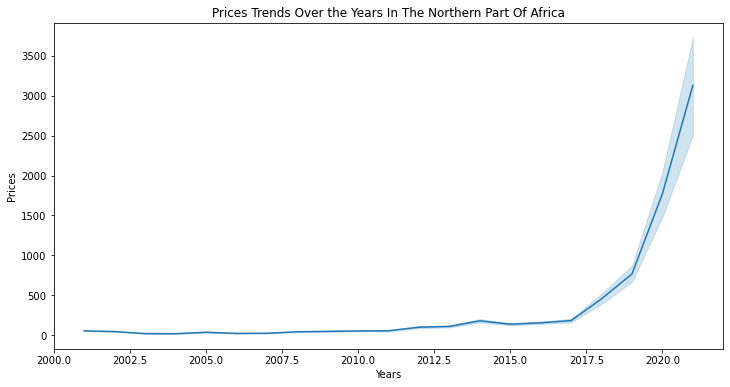

In [25]:
northDS = northern_regionResetIndex
plt.figure(figsize=(12,6))
plt.title("Prices Trends Over the Years In The Northern Part Of Africa")
sns.lineplot(x="year", y="price",data=northDS)
plt.xlabel("Years")
plt.ylabel("Prices")
plt.show()

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

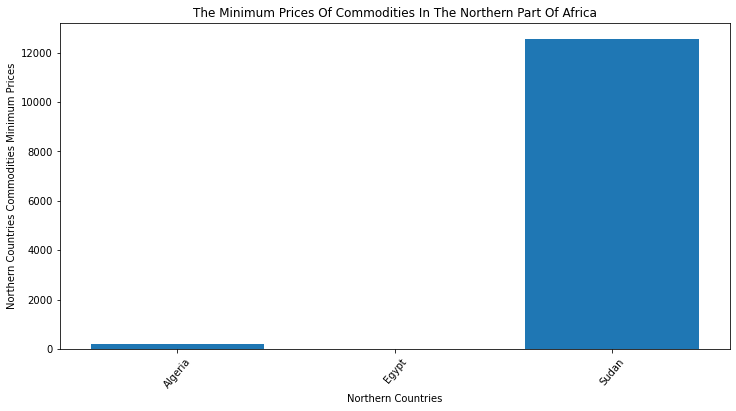

In [26]:
northX = northern_regionResetIndex.country

northY = northern_regionResetIndex.price

plt.figure(figsize=(12,6))
plt.bar(northX,northY)
plt.title("The Minimum Prices Of Commodities In The Northern Part Of Africa")
plt.xlabel("Northern Countries")
plt.ylabel("Northern Countries Commodities Minimum Prices")
plt.xticks(rotation=50)

//========================================================//